In [1]:
# Import needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix 
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score 

In [2]:
# Import the data
df_original = pd.read_csv(r'/Users/ibby/Desktop/frauddata.csv')

In [3]:
# Make a copy of the dataset, and make edits on that
df = df_original.copy()

In [4]:
# Check the head to see if everything looks good
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


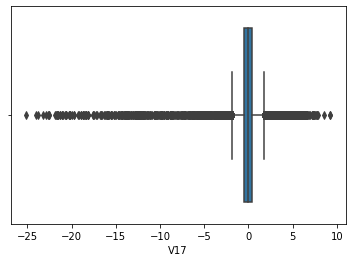

In [5]:
sns.boxplot(df['V17'])

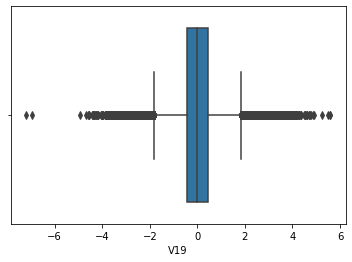

In [6]:
sns.boxplot(df['V19'])

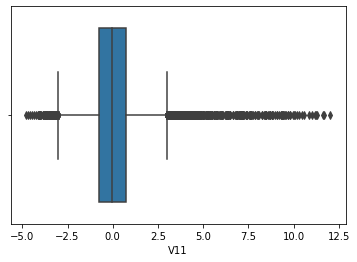

In [7]:
sns.boxplot(df['V11'])

In [ ]:
# Import more li

# Vanilla Models

In [8]:
# Start splitting the data

X = df.drop('Class',axis=1)

y = df['Class']

#Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

# create a validation set. 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2, random_state=2)

In [9]:
# Check the shape of the train and test train

print(f'The shape of X_Train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_val is {X_val.shape}')
print(f'The shape of Y_Train is {y_train.shape}')
print(f'The shape of Y_test is {y_test.shape}')
print(f'The shape of Y_val is {y_val.shape}')

The shape of X_Train is (182276, 30)
The shape of X_test is (56962, 30)
The shape of X_val is (45569, 30)
The shape of Y_Train is (182276,)
The shape of Y_test is (56962,)
The shape of Y_val is (45569,)


# Linear Regression Vanilla

In [10]:
# import needed library
from sklearn.linear_model import LinearRegression

In [11]:
# instantiate the model
linreg = LinearRegression()
# fit the model to the train data
linreg.fit(X_train,y_train)

LinearRegression()

In [12]:
# get the prediction
y_preds = linreg.predict(X_val)
# calculate the mse
mse_linreg = mean_squared_error(y_val, y_preds)

NameError: name 'mean_squared_error' is not defined

In [ ]:
# print the mse
print(f'the mean squared error for Linear Regression Vanilla is: {mse_linreg}'.title())
print(f'The R^2 value is : {r2_score(y_val, y_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(linreg,X,y, cv=3))}')